In [1]:
import torch
import torch.nn as nn
import numpy as np

import torchvision
import torchvision.transforms as transforms


In [2]:
input_size = 784
hidden_size = 300
num_classes = 10
batch_size = 100
learning_rate = 0.01

In [3]:
#prepare data
import torchvision.datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 86181030.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 50642012.47it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 20739482.09it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12759898.71it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
print("Train dataset shape:", train_dataset.data.shape)
print("Test dataset shape:", test_dataset.data.shape)

Train dataset shape: torch.Size([60000, 28, 28])
Test dataset shape: torch.Size([10000, 28, 28])


In [5]:
from torch.utils.data import DataLoader
batchsize = 64 #how many samples of data or datapoints to be processed at one
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

8


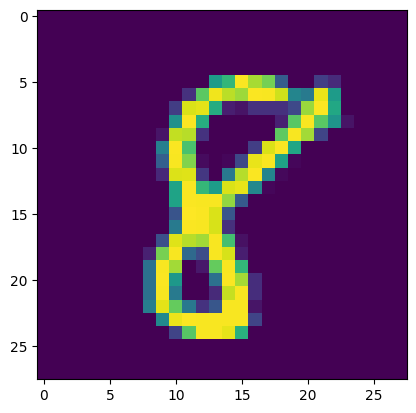

In [6]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
    plt.imshow(images[0].reshape((28,28)))
    break

In [7]:
class NeuralNet(nn.Module):
    def __init__(self):
      super(NeuralNet, self).__init__()
      self.fc1=nn.Linear(784,300)
      self.relu1=nn.ReLU()
      self.fc2=nn.Linear(300,300)
      self.relu2=nn.ReLU()
      self.fc3=nn.Linear(300,10)


    def forward(self, x):
      x=self.fc1(x)
      x=self.relu1(x)
      x=self.fc2(x)
      x=self.relu2(x)
      out=self.fc3(x)

      return out

model = NeuralNet()

In [8]:
num_epochs = 1

In [13]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
model.parameters()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images.view(-1, 28 * 28))  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

print("Training complete!")

Epoch 1/1, Loss: 0.2827
Training complete!


In [16]:
# Evaluation on the test set
model.eval()
correct = 0 ## Initialize a variable to count the number of correctly predicted samples
total = 0 ## Initialize a variable to count the number of total samples
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.view(-1, 28 * 28))
        _, predicted = torch.max(outputs.data, 1) #get the class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 95.31%
